In [ ]:
dataset_dir = r"C:\Users\lokesh r\Documents\parking lot"  


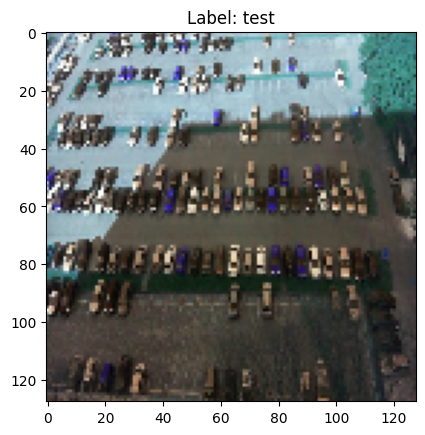

In [13]:
import os
import cv2
import numpy as np

img_size = 128 
labels = []
images = []

for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png"):
            img_path = os.path.join(root, file)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.resize(img, (img_size, img_size))  
            img = img / 255.0  
            label = root.split("\\")[-1]  
            images.append(img)
            labels.append(label)

images = np.array(images)
labels = np.array(labels)

import matplotlib.pyplot as plt

plt.imshow(images[0])
plt.title(f"Label: {labels[0]}")
plt.show()


In [3]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
labels_encoded = to_categorical(labels_encoded)

# Display the encoded labels for verification
print(labels_encoded[0])


[1. 0. 0.]


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)
print(f"Training data size: {len(X_train)} | Test data size: {len(X_test)}")


Training data size: 9932 | Test data size: 2484


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\lokesh r\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,707 (28.20 MB)

 Trainable params: 7,392,707 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)


Epoch 1/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 145s 557ms/step - accuracy: 0.6966 - loss: 1.1094 - val_accuracy: 0.6925 - val_loss: 0.8325
Epoch 2/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 130s 519ms/step - accuracy: 0.6915 - loss: 0.8346 - val_accuracy: 0.6925 - val_loss: 0.8436
Epoch 3/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 121s 487ms/step - accuracy: 0.7020 - loss: 0.8310 - val_accuracy: 0.6925 - val_loss: 0.8118
Epoch 4/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 121s 487ms/step - accuracy: 0.7050 - loss: 0.8108 - val_accuracy: 0.6925 - val_loss: 0.8111
Epoch 5/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 119s 477ms/step - accuracy: 0.7037 - loss: 0.8124 - val_accuracy: 0.6925 - val_loss: 0.8192
Epoch 6/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 115s 463ms/step - accuracy: 0.7048 - loss: 0.8043 - val_accuracy: 0.6925 - val_loss: 0.8147
Epoch 7/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 120s 483ms/step - accuracy: 0.7066 - loss: 0.7942 - val_accuracy: 0.6925 - val_loss: 0.8139
Epoch 8/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 120s 480ms/step - accuracy: 0.6940 -

In [7]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.7098 - loss: 0.8011
Test Accuracy: 70.13%


In [8]:
def calculate_parking_fee(vehicle_type, duration):
    base_rate = 5  # Base rate in dollars per hour
    factor = {
        "small": 1.0,
        "medium": 1.5,
        "large": 2.0
    }
    return base_rate * duration * factor.get(vehicle_type.lower(), 1.0)

# Example usage:
vehicle_type = "medium"  
duration = 3.0  
fee = calculate_parking_fee(vehicle_type, duration)
print(f"Parking Fee: ${fee:.2f}")


Parking Fee: $22.50


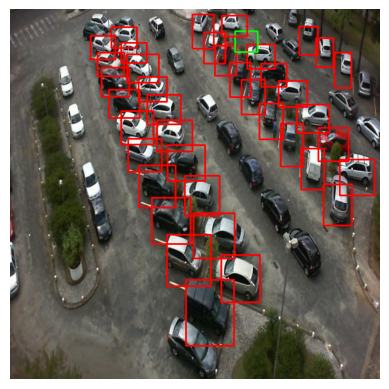

In [18]:
train_dir = r'C:\Users\lokesh r\Documents\parking lot\train' 
anno_train = r'C:\Users\lokesh r\Documents\parking lot\train\_annotations.coco.json' 

with open(anno_train, "r") as file:
    data = json.load(file)

for image_info in data['images']:
    image_id = image_info['id']
    image_path = os.path.join(train_dir, image_info['file_name'])

    image = cv2.imread(image_path)
    if image is None:
        continue

    for annotation in data['annotations']:
        if annotation['image_id'] == image_id: 
            category_id = annotation['category_id']
            bbox = annotation['bbox']
            x, y, w, h = map(int, bbox)

            if category_id == 1:
                color = (0, 255, 0)  
            elif category_id == 2:
                color = (0, 0, 255)  
            else:
                color = (255, 0, 0)  

            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    
    break
